###**Intrucciones**

**Continuar desde la Parte IV**
- Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.

**Exploración de Datos Avanzada**
- Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
- Crea subplots para comparar diferentes variables clave.
- Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

**Generar un Tag en GitHub y Realizar una Presentación**
- Generar un Tag en GitHub: Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub, genera un Pull Request (PR) para revisión y finalmente crea un tag para esta versión del proyecto.

**Realizar una Presentación:**
- Prepara una presentación en slides que resuma tu análisis y visualizaciones.

La presentación debe incluir:
- Introducción y objetivos del proyecto.
- Descripción del conjunto de datos.
- Principales análisis y hallazgos.
- Visualizaciones clave con explicación.
- Conclusiones y recomendaciones.
**Utiliza herramientas como PowerPoint, Google Slides o cualquier otra aplicación de presentación.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/BBDD_Bootcamp_DataScience_Skillnest/retail_sales_dataset.csv"
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
#Limpieza de nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

In [9]:
#Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

#Calcular la correlación en variables numericas
correlation_matrix = df[['age', 'quantity', 'price_per_unit', 'total_amount']].corr()
print("n\Matrix de Correlación: ")
print(correlation_matrix)


n\Matrix de Correlación: 
                     age  quantity  price_per_unit  total_amount
age             1.000000 -0.023737       -0.038423     -0.060568
quantity       -0.023737  1.000000        0.017501      0.373707
price_per_unit -0.038423  0.017501        1.000000      0.851925
total_amount   -0.060568  0.373707        0.851925      1.000000


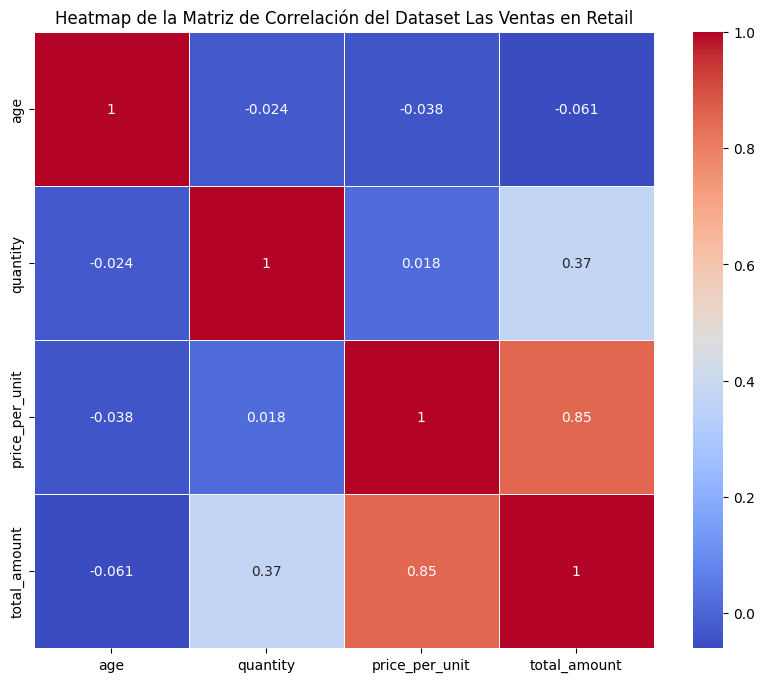

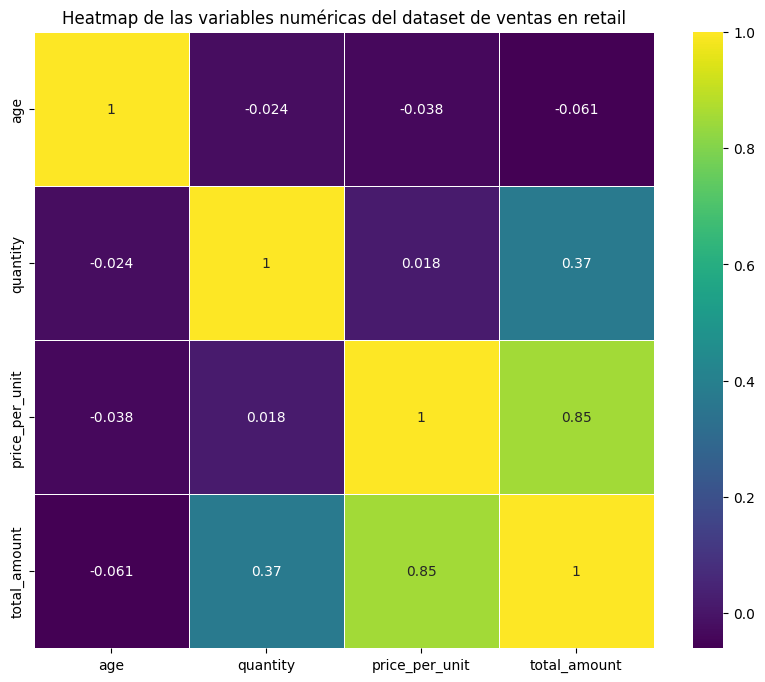

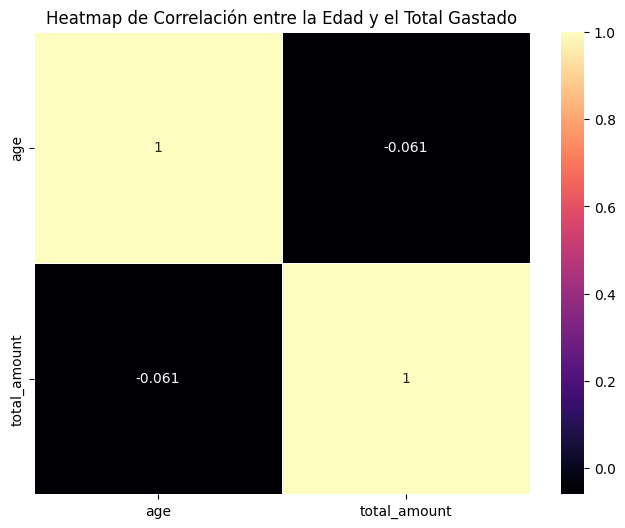

In [20]:
#Gráficamos
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Heatmap de la Matriz de Correlación del Dataset Las Ventas en Retail')
plt.show()

plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('transaction_id', errors='ignore')
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap de las variables numéricas del dataset de ventas en retail')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'total_amount']].corr(), annot=True, cmap='magma', linewidths=0.5)
plt.title('Heatmap de Correlación entre la Edad y el Total Gastado')
plt.show()



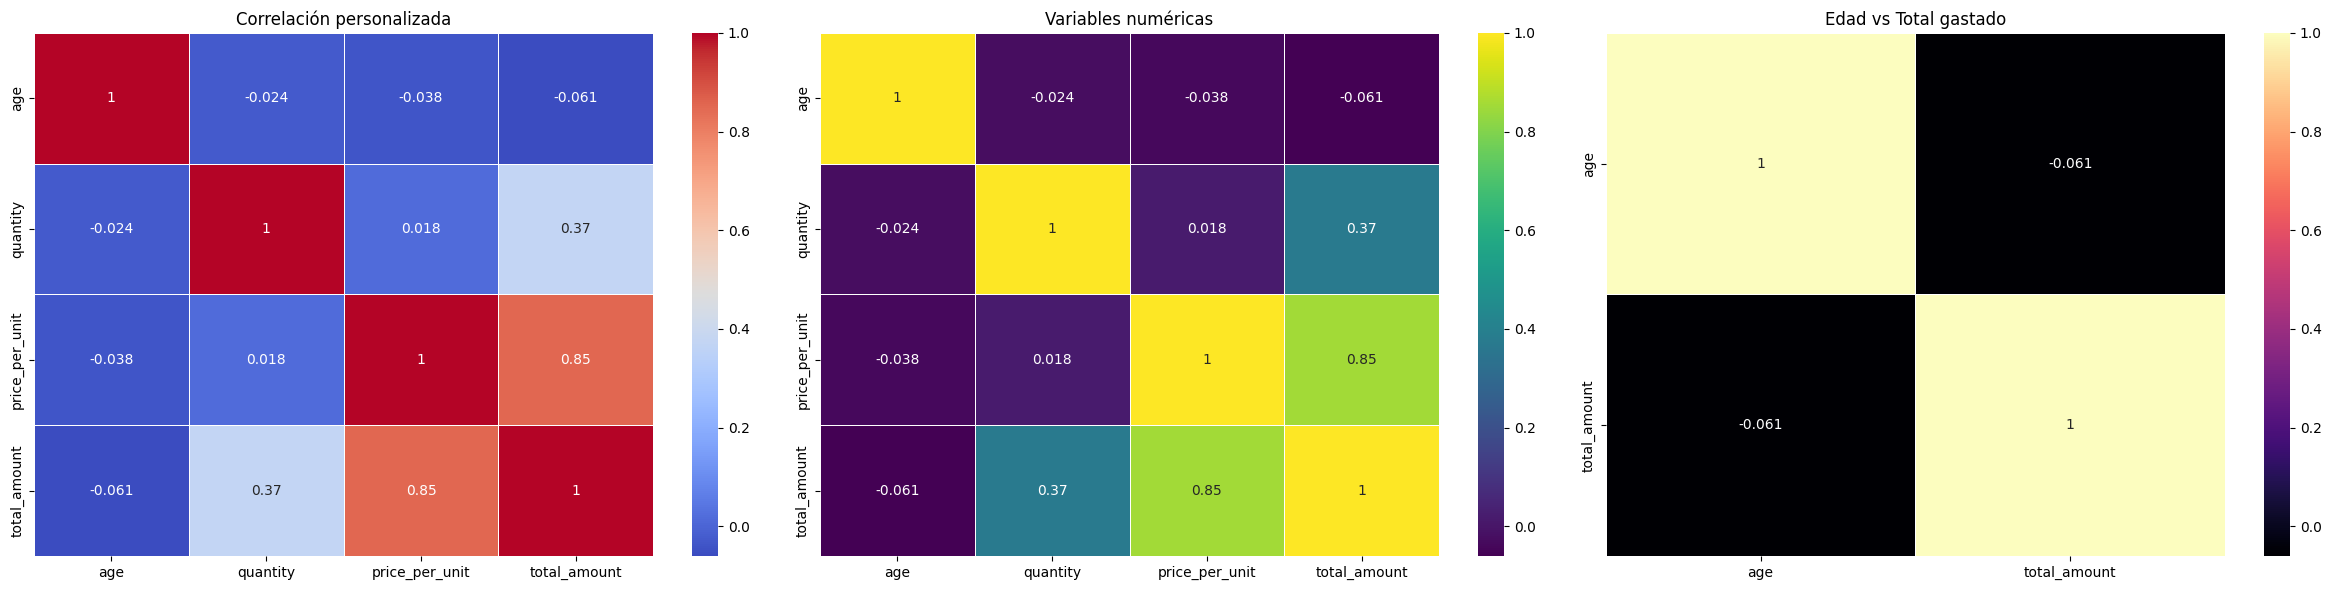

In [19]:
#Ajustamos la visual de las gráficas para que sea mas fácil analizarlas
# Crear una figura con 1 fila y 3 columnas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))  # ajusta el ancho según necesidad

# Primer heatmap: matriz de correlación personalizada
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axs[0])
axs[0].set_title('Correlación personalizada')

# Segundo heatmap: todas las variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('transaction_id', errors='ignore')
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis', linewidths=0.5, ax=axs[1])
axs[1].set_title('Variables numéricas')

# Tercer heatmap: edad vs total_amount
sns.heatmap(df[['age', 'total_amount']].corr(), annot=True, cmap='magma', linewidths=0.5, ax=axs[2])
axs[2].set_title('Edad vs Total gastado')

# Ajustar diseño para que no se encimen
plt.tight_layout()
plt.show()

###**Conclusiones**
####Análisis de las tres gráficas
**Correlación personalizada**

Muestra cómo se relacionan cuatro variables: edad, cantidad, precio unitario y monto total.
- La relación más fuerte es entre precio unitario y total gastado (0.85), lo cual es lógico: a mayor precio por unidad, mayor será el total.
- También hay una relación moderada entre cantidad y total gastado (0.37).
- La edad no se relaciona significativamente con ninguna de las otras variables (todos los valores cercanos a 0).

**Variables numéricas**

Es otra vista del mismo análisis anterior, solo que con un diseño de color distinto. Repite exactamente los mismos valores de correlación, pero el mapa es más contrastado visualmente (tonos amarillos y púrpuras) para destacar las diferencias.

**Edad vs Total gastado**

Esta tercera gráfica se enfoca únicamente en la relación entre edad y monto total gastado, destacando que la correlación es muy baja: -0.061. Esto indica que la edad no influye en cuánto gasta una persona, al menos según este conjunto de datos

**En RESUMEN:**
- El precio por unidad es el factor más determinante del total gastado.
- La cantidad comprada también influye, pero menos.
- La edad no tiene una relación significativa con los otros valores, especialmente con lo que la persona gasta.

*no importa si alguien es joven o mayor, lo que realmente impulsa el gasto es cuánto cuestan las cosas y cuántas se compran.*




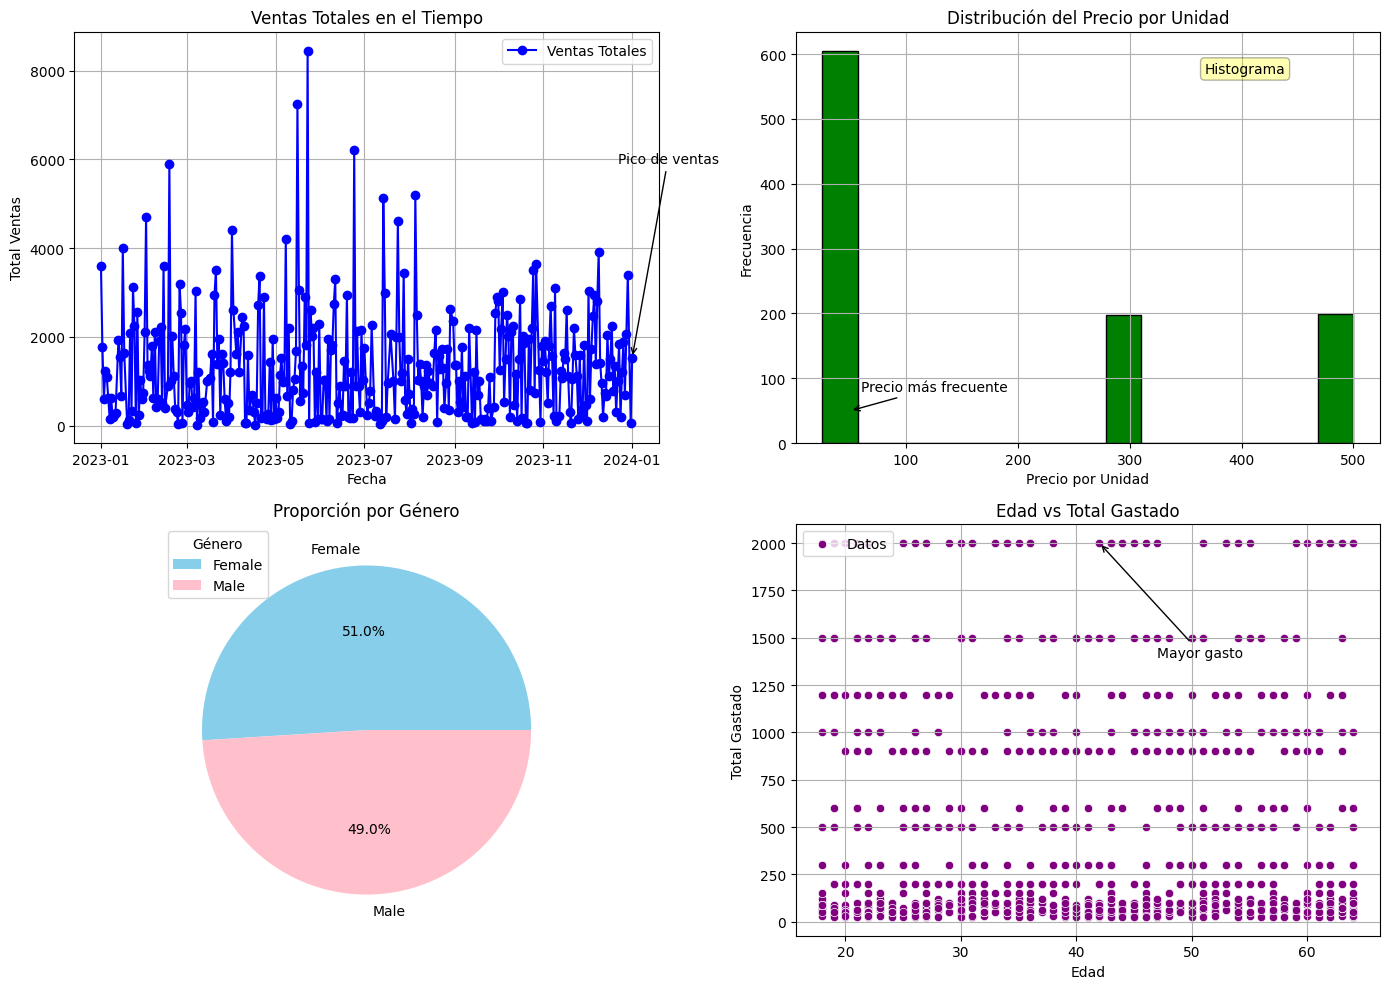

In [28]:
#Gráficas para analizar distintas variables del Dataset mediante subplot

#Cambio del tipo de dato a 'date' se pasa a datetime
df['date'] = pd.to_datetime(df['date'])

# Agrupar ventas totales por fecha
ventas_por_fecha = df.groupby('date')['total_amount'].sum()

# Crear figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# --- Gráfico de líneas: ventas totales en el tiempo ---
axs[0, 0].plot(ventas_por_fecha.index, ventas_por_fecha.values, marker='o', color='blue', label='Ventas Totales')
axs[0, 0].set_title('Ventas Totales en el Tiempo')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Total Ventas')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Flecha indicadora (ejemplo en el último punto)
axs[0, 0].annotate('Pico de ventas',
                   xy=(ventas_por_fecha.index[-1], ventas_por_fecha.values[-1]),
                   xytext=(ventas_por_fecha.index[-10], ventas_por_fecha.values.max()*0.7),
                   arrowprops=dict(facecolor='black', arrowstyle='->'),
                   fontsize=10)

# --- Histograma: distribución del precio por unidad ---
axs[0, 1].hist(df['price_per_unit'], bins=15, color='green', edgecolor='black')
axs[0, 1].set_title('Distribución del Precio por Unidad')
axs[0, 1].set_xlabel('Precio por Unidad')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].grid(True)
# Leyenda sencilla con cuadro de texto
axs[0, 1].text(0.7, 0.9, 'Histograma', transform=axs[0, 1].transAxes,
               bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3))

# Flecha indicadora (por ejemplo, hacia el rango de precios más frecuente)
axs[0, 1].annotate('Precio más frecuente',
                   xy=(df['price_per_unit'].mode()[0], 50),
                   xytext=(df['price_per_unit'].mode()[0]+10, 80),
                   arrowprops=dict(facecolor='black', arrowstyle='->'),
                   fontsize=10)

# --- Gráfico de pastel: proporción por género ---
gender_counts = df['gender'].value_counts()
axs[1, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'])
axs[1, 0].set_title('Proporción por Género')
# Leyenda con título
axs[1, 0].legend(title='Género', loc='best')

# --- Gráfico de dispersión: edad vs total gastado ---
sns.scatterplot(data=df, x='age', y='total_amount', ax=axs[1, 1], color='purple', label='Datos')
axs[1, 1].set_title('Edad vs Total Gastado')
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('Total Gastado')
axs[1, 1].grid(True)
axs[1, 1].legend(loc='upper left')  # Aquí movemos la leyenda a la esquina superior izquierda


# Flecha indicadora en dispersión (ejemplo en punto con mayor gasto)
max_gasto = df.loc[df['total_amount'].idxmax()]
axs[1, 1].annotate('Mayor gasto',
                   xy=(max_gasto['age'], max_gasto['total_amount']),
                   xytext=(max_gasto['age']+5, max_gasto['total_amount']*0.7),
                   arrowprops=dict(facecolor='black', arrowstyle='->'),
                   fontsize=10)

plt.tight_layout()
plt.show()